# Import

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn import model_selection
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
import warnings

import seaborn as sns

# Lecture des données:

In [2]:
df=pd.read_csv("data.csv")
df

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,Sanofi,Data scientist,Matlab/Python/Pyspark/Scikit-learn/Tensorflow,Master,1,Paris
1,Massachusetts General Hospital(MGH),Data architecte,Python/Java/Scala/MongoDB,Master,3,Marseille
2,Delve,Lead data scientist,SPSS/SQL/Teradata/R/Python/Tensorflow/scikit-l...,Master,3,Nantes
3,Ann & Robert H. Lurie Children’s Hospital of C...,Data scientist,C/C++/Java/Python,Master,"1,5",Marseille
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
...,...,...,...,...,...,...
9577,Massachusetts General Hospital(MGH),Data scientist,C++/R/Python/Matlab/Matplotlib,Master,"1,5",Lyon
9578,Charles River Analytics,Data scientist,Excel/Python/Matlab/R/machine learning/anglais,Master,11,Toulouse
9579,Ball Aerospace,Data scientist,R/machine learning/Excel/VBA,Master,1,Paris
9580,Takeda Pharmaceutical,Data scientist,Python/Pyspark/machine learning/Microsoft Azure,Master,17,Rennes


In [3]:
print("---------------------------------------------------------------------")
print("cette dataframe comporte {} observations avec {} variables chacune.".format(df.shape[0], df.shape[1]))
print("---------------------------------------------------------------------")

---------------------------------------------------------------------
cette dataframe comporte 9582 observations avec 6 variables chacune.
---------------------------------------------------------------------


In [4]:
#extraire les informations de notre dataframe pour savoir les types de données qu'on traite
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Entreprise    9565 non-null   object
 1   Metier        9563 non-null   object
 2   Technologies  9582 non-null   object
 3   Diplome       9582 non-null   object
 4   Experience    9488 non-null   object
 5   Ville         9582 non-null   object
dtypes: object(6)
memory usage: 449.3+ KB


In [5]:
# on remarque sur les infos() que notre dataframe posséde des champs vide
null_counts = df.isnull().sum()
pd.DataFrame(null_counts).T

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
0,17,19,0,0,94,0


In [6]:
# les lignes ayant des valeurs null
null_rows = df[df.isnull().any(axis=1)]
null_rows

,Entreprise,Metier,Technologies,Diplome,Experience,Ville
4,Arm,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Phd,NaN,Bordeaux
28,Voya Financial,Lead data scientist,SAS/Teradata/SQL/R/Python/Machine learning/Ang...,Master,NaN,Marseille
104,Capgemini,Data scientist,Matlab/Python/C++/numpy/Tensorflow/scikit-learn,Bachelor,NaN,Bordeaux
161,JLL,Data engineer,C/C++/Java/Python/Linux,Master,NaN,Toulouse
346,Jacobs,NaN,Python/Spark/GNU/Linux,No diploma,"2,5",Paris
...,...,...,...,...,...,...
9490,Pearson,NaN,R/Python/Spark/Pycharm/SAS/SQL,Master,4,Marseille
9496,United States Soccer Federation,Data scientist,Excel/VBA/R,Master,NaN,Marseille
9498,Delta Air Lines,Data architecte,Java/AWS/Elasticsearch/Kibana,No diploma,NaN,Lyon
9510,General Electric,Data architecte,Hadoop/Hive/Vertica/Tableau,Master,NaN,Toulon


# Prepocessing

In [7]:
#transformer les données en float
df["Experience"] = df["Experience"].apply(lambda x: float(str(x).replace(",",".")))

In [8]:
#Traitement de la colonne Technologies
df['Technologies']=df['Technologies'].apply(lambda x: x.split('/'))

In [12]:
mask_DS = df['Metier'] == 'Data scientist'
mask_DE = df['Metier'] == 'Data engineer'
mask_DA = df['Metier'] == 'Data architecte'
mask_LDS = df['Metier'] == 'Lead data scientist'

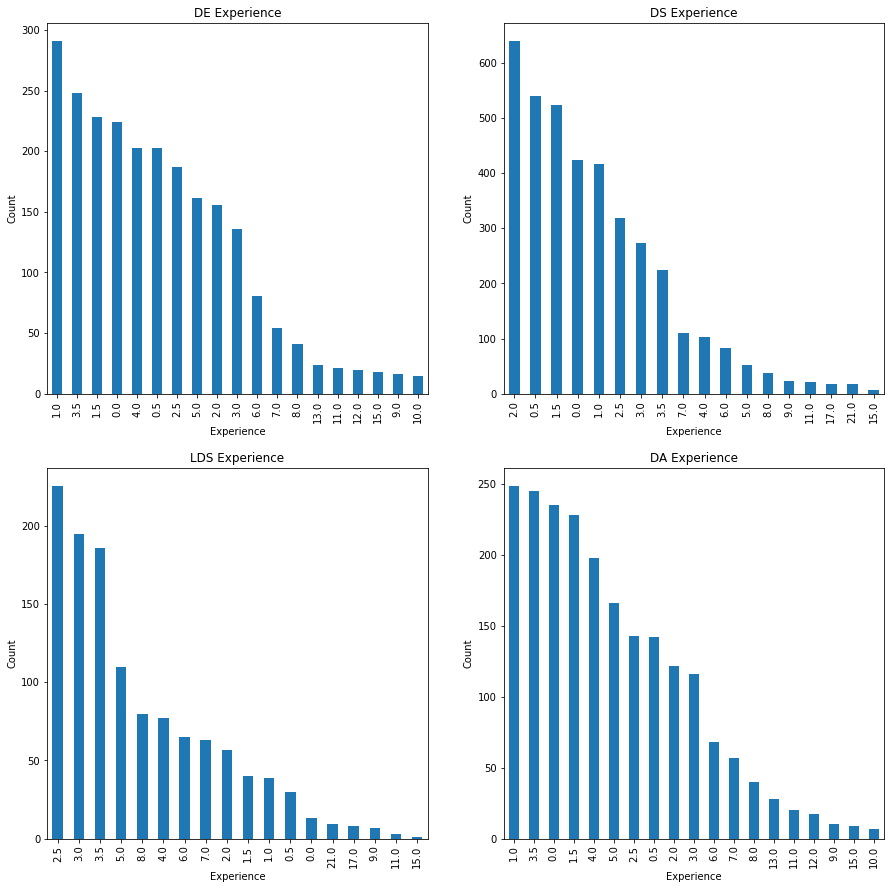

In [13]:
fig, axs = plt.subplots(2, 2, figsize=(15, 15))

axs[0, 0].set_title('DE Experience')
axs[0, 0].set_xlabel('Experience')
axs[0, 0].set_ylabel('Count')
df[mask_DE]['Experience'].value_counts().plot(ax=axs[0, 0], kind='bar')

axs[0, 1].set_title('DS Experience')
axs[0, 1].set_xlabel('Experience')
axs[0, 1].set_ylabel('Count')
df[mask_DS]['Experience'].value_counts().plot(ax=axs[0, 1], kind='bar')

axs[1, 0].set_title('LDS Experience')
axs[1, 0].set_xlabel('Experience')
axs[1, 0].set_ylabel('Count')
df[mask_LDS]['Experience'].value_counts().plot(ax=axs[1, 0], kind='bar')

axs[1, 1].set_title('DA Experience')
axs[1, 1].set_xlabel('Experience')
axs[1, 1].set_ylabel('Count')
df[mask_DA]['Experience'].value_counts().plot(ax=axs[1, 1], kind='bar')

plt.show()

In [14]:
#Imputation des valeurs manquantes pour la variables experience

mean_DS = df[mask_DS]['Experience'].dropna().median()
df.loc[mask_DS, 'Experience'] = df.loc[mask_DS,'Experience'].fillna(round(mean_DS,1))
print("---------------------------------------------------------")
print("la valeur moyenne de l'experience pour un Datascience est: ",round(mean_DS,1))
print("---------------------------------------------------------")

---------------------------------------------------------
la valeur moyenne de l'experience pour un Datascience est:  2.0
---------------------------------------------------------


In [15]:
#Imputation des valeurs manquantes pour la variables experience

mask_DE = df['Metier'] == 'Data engineer'
median_DE = df[mask_DE]['Experience'].dropna().median()
df.loc[mask_DE, 'Experience'] = df.loc[mask_DE,'Experience'].fillna(median_DE)
print("---------------------------------------------------------")
print("la valeur médiane de l'experience pour un Datascience est: ",median_DE)
print("---------------------------------------------------------")

---------------------------------------------------------
la valeur médiane de l'experience pour un Datascience est:  2.5
---------------------------------------------------------


In [16]:
null_counts = df.isnull().sum()
display(null_counts)

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience      42
Ville            0
dtype: int64

In [17]:
#Imputation des valeurs manquantes pour la variables experience

mask_LDS = df["Metier"]  == "Lead data scientist"
mean_LDS = df[mask_LDS]['Experience'].dropna().mean()
df.loc[mask_LDS, 'Experience'] = df.loc[mask_LDS,'Experience'].fillna(round(mean_LDS,1))
print("---------------------------------------------------------")
print("la valeur médiane de l'experience pour un Datascience est: ",round(mean_LDS,1))
print("---------------------------------------------------------")

---------------------------------------------------------
la valeur médiane de l'experience pour un Datascience est:  4.0
---------------------------------------------------------


In [18]:
#Imputation des valeurs manquantes pour la variables experience

mask_DA = df["Metier"]  == "Data architecte"
mean_DA = df[mask_DA]['Experience'].dropna().mean()
df.loc[mask_DA, 'Experience'] = df.loc[mask_DA,'Experience'].fillna(round(mean_DA,1))
print("---------------------------------------------------------")
print("la valeur médiane de l'experience pour un Datascience est: ",round(mean_DA,1))
print("---------------------------------------------------------")

---------------------------------------------------------
la valeur médiane de l'experience pour un Datascience est:  3.0
---------------------------------------------------------


In [19]:
null_counts = df.isnull().sum()
display(null_counts)

Entreprise      17
Metier          19
Technologies     0
Diplome          0
Experience       0
Ville            0
dtype: int64

In [20]:
means={}
means["data_science"]=round(df[mask_DS]['Experience'].mean(),1)
means["lead_data_science"]=round(df[mask_LDS]['Experience'].mean(),1)
means["data_architecte"]=round(df[mask_DA]['Experience'].mean(),1)
means["data_engineer"]=round(df[mask_DE]['Experience'].mean(),1)

In [21]:
print("Les profils ont en moyenne (d'années d'experiences):\n")
print("Data scientist      : {} ".format(means["data_science"]))
print("Lead data scientist : {} ".format(means["lead_data_science"]))
print("Data architecte     : {} ".format(means["data_architecte"]))
print("Data enginner       : {} ".format(means["data_engineer"]))

Les profils ont en moyenne (d'années d'experiences):

Data scientist      : 2.2 
Lead data scientist : 4.0 
Data architecte     : 3.0 
Data enginner       : 3.0 


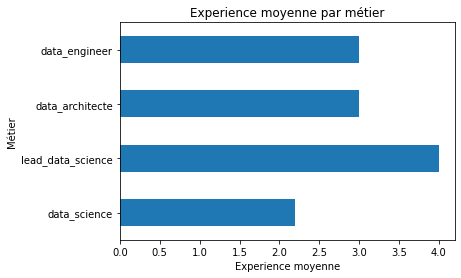

In [22]:
# créer un bar chart des experience moyenne selon chaque métier
pd.Series(means, index=means.keys()).plot(kind='barh')


plt.xlabel('Experience moyenne')
plt.ylabel('Métier')
plt.title('Experience moyenne par métier')


plt.show()

In [23]:
variance={}
professions=df["Metier"].dropna().unique()
for profession in professions:
    # calculate the minimum and maximum values
    a = df[df["Metier"]  ==profession]["Experience"].var()
    b = df[df["Metier"]  ==profession]["Experience"].mean()

    # calculate the variance assuming a uniform distribution
    variance[profession]="Moyenne : {}, Variance : {}".format(round(b,1),round(a,1))
variance

{'Data scientist': 'Moyenne : 2.2, Variance : 6.3',
 'Data architecte': 'Moyenne : 3.0, Variance : 7.3',
 'Lead data scientist': 'Moyenne : 4.0, Variance : 7.1',
 'Data engineer': 'Moyenne : 3.0, Variance : 7.7'}

In [24]:
# expertise
df['Exp_label']= pd.cut(df.Experience,4 , labels=['Debutant','Confirme','Avance','Expert'])

In [25]:
technologies={}
for idx , row in df.iterrows():
    for technologie in row['Technologies']:
        if technologie not in technologies:
            technologies[technologie]=1
        else:
            technologies[technologie]+=1
technologies = dict(sorted(technologies.items(), key=lambda x:x[1] ))


In [52]:
top_technologies=list(technologies.keys())[-5:]

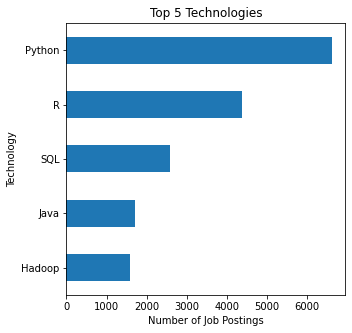

In [26]:
fig=plt.figure(figsize=(5,5))
ax = fig.add_subplot()
ax.set_title('Top 5 Technologies')
ax.set_xlabel('Number of Job Postings')
ax.set_ylabel('Technology')
pd.Series(list(technologies.values())[-5:], index=list(technologies.keys())[-5:]).plot(kind='barh', ax=ax)
plt.show()

# Clustering

In [ ]:
df

In [27]:
print("Proportion des valeurs redondants pour les entreprises {:.2%}".format((len(df['Entreprise'].unique())/len(df['Entreprise']))))
print("Proportion des valeurs redondants pour les villes {:.2%}".format(len(df['Ville'].unique())/len(df['Ville'])))

Proportion des valeurs redondants pour les entreprises 14.43%
Proportion des valeurs redondants pour les villes 0.15%


On procéde à l'ecodage des données et on gnore la colonne "Entreprise" car elle va pas service comme input dans le model.

In [28]:
le = preprocessing.LabelEncoder()

df_enc = df.loc[:, ['Experience']]
df_enc['Ville_enc'] = pd.Series(le.fit_transform(
    np.squeeze(df.loc[:, ['Ville']])[:]), index=df_enc.index)
df_enc['Diplome_enc'] = pd.Series(le.fit_transform(
    np.squeeze(df.loc[:, ['Diplome']])[:]), index=df_enc.index)
df_enc['Exp_level_enc'] = pd.Series(le.fit_transform(
    np.squeeze(df.loc[:, ['Exp_label']])[:]), index=df_enc.index)
dummies = df['Technologies'].apply(lambda x: pd.Series({i: 1 for i in x })).fillna(0)
df_enc = pd.merge(df_enc,dummies,left_index=True, right_index=True )
df_enc = np.round(df_enc, 2)

df_enc.head()

,Experience,Ville_enc,Diplome_enc,Exp_level_enc,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,...,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS)
0,1.0,8,1,2,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,4,1,2,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,6,1,2,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.5,4,1,2,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2.0,0,3,2,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Mise à l'echel des données MinMaxScaler met à l'échelle toutes les caractéristiques des données dans la plage [0,1]. 

In [29]:
X = df_enc.astype(float)
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X) 

In [30]:
df_scaled = pd.DataFrame(X_scaled,columns= df_enc.columns )
df_scaled.head()

,Experience,Ville_enc,Diplome_enc,Exp_level_enc,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,...,MySQL,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS)
0,0.047619,0.615385,0.333333,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.142857,0.307692,0.333333,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.142857,0.461538,0.333333,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.071429,0.307692,0.333333,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.095238,0.000000,1.000000,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Elbow Method pour determiner le nombre de cluster à prendre:


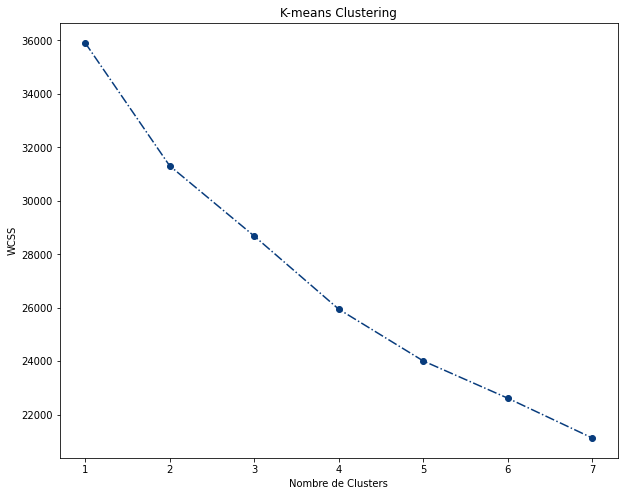

In [31]:
print('Elbow Method pour determiner le nombre de cluster à prendre:')
wcss = []
kmeans_pca=[]
for i in range(1,8):
    kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 40)
    kmeans_pca.fit(df_scaled)
    wcss.append(kmeans_pca.inertia_)


plt.figure(figsize = (10,8))
plt.plot(range(1,8), wcss, marker = 'o', linestyle = '-.',color='#083C7D')
plt.xlabel('Nombre de Clusters')
plt.ylabel('WCSS')
plt.title('K-means Clustering')
plt.show()

Application du Clustering: Kmeans

In [32]:
kmeans = KMeans(n_clusters=4, max_iter=100, algorithm='auto')
kmeans.fit_predict(X_scaled)
labels_ = kmeans.labels_
centroids = kmeans.cluster_centers_ 

# Evaluation de l'erreur de clustering
c1, c2, c3, c4 = kmeans.cluster_centers_

Visualiser les cluster

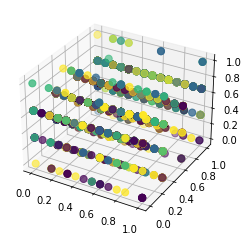

In [33]:
# Créer une figure en 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Visualisez les résultats en utilisant des graphiques pour voir comment les données sont réparties dans les différents clusters
ax.scatter(X_scaled[:, 1], X_scaled[:, 2],X_scaled[:,3], s=50,c=labels_, cmap='viridis')
plt.show()

Concatener les label des cluster avec notre scaled dataframe

In [34]:
df_scaled["Cluster"] = kmeans.labels_

In [35]:
df_scaled

,Experience,Ville_enc,Diplome_enc,Exp_level_enc,Matlab,Python,Pyspark,Scikit-learn,Tensorflow,Java,...,Cassandra,NoSQL,Matplotlib,Map-Reduce,PIG,HBASE,Windows,NoSQ,Hadoop(HDFS),Cluster
0,0.047619,0.615385,0.333333,0.666667,1.0,1.0,1.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
1,0.142857,0.307692,0.333333,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,0.142857,0.461538,0.333333,0.666667,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.071429,0.307692,0.333333,0.666667,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
4,0.095238,0.000000,1.000000,0.666667,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9577,0.071429,0.230769,0.333333,0.666667,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9578,0.523810,1.000000,0.333333,0.000000,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9579,0.047619,0.615385,0.333333,0.666667,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
9580,0.809524,0.692308,0.333333,1.000000,0.0,1.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


Métrique pour évaluation de l'erreur de Clustering avec la méthode MSE normalisée. Le MSE normalisée permet de comparer l'erreur pour des ensembles dont les plages de valeurs sont différentes.

In [36]:
def NMSE(predictions, targets): return 100 * ((predictions -  targets)**2).sum() / ((predictions)**2).sum()

df_scaled.astype(float)
# NMSE() sur le premier centroid 
dist1 = NMSE(X_scaled[labels_ == 0], c1)
# NMSE() sur le second centroid 
dist2 = NMSE(X_scaled[labels_ == 1], c2)
# NMSE() sur le premier centroid 
dist3 = NMSE(X_scaled[labels_ == 2], c3)
# NMSE() sur le second centroid 
dist4 = NMSE(X_scaled[labels_ == 3], c4)

print("\n")
print('La métrique utilisée est l"erreur moyenne quadratique normalisée par rapports pour chaque cluster: {0:2.2f}% et {1:2.2f}% et {2:2.2f}% et {3:2.2f}% '.format(dist1, dist2, dist3, dist4))
print("\n")



La métrique utilisée est l"erreur moyenne quadratique normalisée par rapports pour chaque cluster: 64.03% et 37.57% et 37.40% et 55.53% 




In [37]:
data_c=pd.merge(df, df_scaled["Cluster"], left_index=True, right_index=True)

In [ ]:
data_c

In [38]:
mask_cluster1=data_c['Cluster']==1
mask_cluster2=data_c['Cluster']==2
mask_cluster3=data_c['Cluster']==3
mask_cluster4=data_c['Cluster']==4

['Matlab' 'Python' 'Pyspark' ... 'Python' 'Excel' 'R']


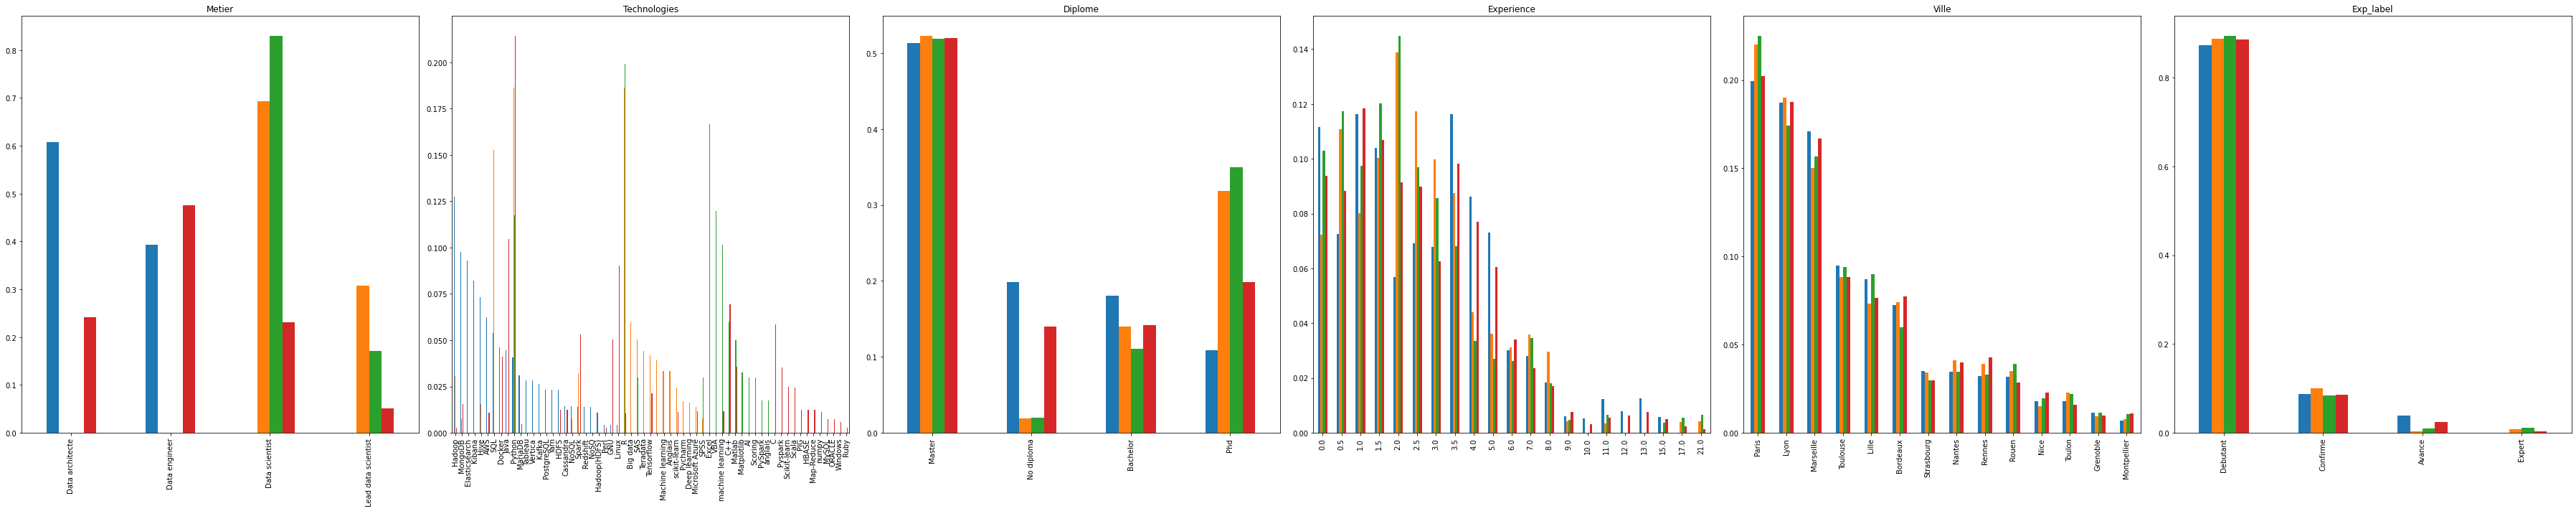

In [57]:
# Groupement des données par cluster
grouped_df = data_c.groupby("Cluster")

# Créer une figure pour les sous-graphiques
fig, axs = plt.subplots(ncols=len(df.columns) - 1, figsize=(20, 20))

# Itération sur les colonnes et les sous-graphiques
for i, col in enumerate(data_c.columns[1:-1]):
    # Créer un dictionnaire de fréquences pour la colonne actuelle
    freq_dict = {}
    if col == "Technologies":
        # Use the explode() method to transform the column of lists into a column of values
        col_values = data_c[col].explode()
        print(col_values.values)
        for group_name, group_df in grouped_df:
            col_counts = col_values[group_df.index].value_counts(normalize=True)
            freq_dict[group_name] = col_counts
    else:
        for group_name, group_df in grouped_df:
            col_counts = group_df[col].value_counts(normalize=True)
            freq_dict[group_name] = col_counts

    # Concaténer les fréquences dans une DataFrame
    freq_df = pd.concat(freq_dict, axis=1)

    # Tracer le sous-graphique pour la colonne actuelle
    ax = axs[i]
    freq_df.plot(kind="bar", ax=ax, legend=False, title=col, figsize=(50,10))

# Afficher la figure
plt.tight_layout()
plt.show()

On remarque que les données dont on dispose sont réparties significativement en fonction des variables métiers, technologies, diplome et experience. Ce qui nous laisse conclure que ce sont les variables explicatives de ce clustering. 

In [58]:
mask_metier = df.loc[:, 'Metier'].isna()
X = np.array(df_enc[~mask_metier])
y = le.fit_transform(df.loc[~mask_metier, 'Metier'].dropna())


#Metier_test contient les donnée avec la caractéristique du metier est nulle.
Metier_test = np.array(df_enc[mask_metier])
#Diviser les données 75% pour l'entrainement et 25% pour le test
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=.25, shuffle=True , random_state=40)


model_knn = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [59]:

y_predicted = model_knn.predict(X_test)
cm = confusion_matrix(y_test, y_predicted) 
print('Matrice de confusion :\n')
print('\nLe rapport de classificiation :\n')
print(classification_report(y_test,y_predicted))

Matrice de confusion :


Le rapport de classificiation :

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       542
           1       0.90      0.89      0.89       557
           2       0.82      0.92      0.87       988
           3       0.65      0.37      0.47       304

    accuracy                           0.84      2391
   macro avg       0.81      0.77      0.78      2391
weighted avg       0.83      0.84      0.83      2391



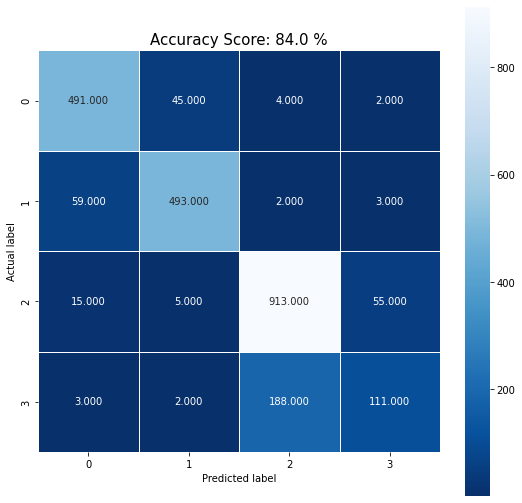

In [60]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0} %'.format(np.round(accuracy_score(y_test, y_predicted), 2)*100)
plt.title(all_sample_title, size = 15);

In [61]:
warnings.filterwarnings(action='ignore', category=DeprecationWarning)
Metier_predicted=model_knn.predict(Metier_test)

#Remplissage de la base de données par les métiers prédis aprés la transformation inverse (Code to String ) 
df.loc[~mask_metier, 'Metier_predicted'] = df.loc[:,'Metier']
df.loc[mask_metier, 'Metier_predicted'] = le.inverse_transform(Metier_predicted)

#Affichage
print("Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de kNN:\n")
df[mask_metier]

Le résultat de la prediction des métiers manquants est obtenu à l'aide d'une classification des données avec le model de kNN:



,Entreprise,Metier,Technologies,Diplome,Experience,Ville,Exp_label,Metier_predicted
346,Jacobs,NaN,"[Python, Spark, GNU, Linux]",No diploma,2.5,Paris,Debutant,Data engineer
2058,Ball Aerospace,NaN,"[VBA, Python, Excel, R]",Master,15.0,Lyon,Avance,Data engineer
2670,"eHire, LLC",NaN,"[Java, C, C++, R, Python]",Master,1.5,Toulouse,Debutant,Data scientist
2899,Norfolk Southern Corp,NaN,"[Python, Tensorflow, scikit-learn, Deep learni...",Phd,0.0,Grenoble,Debutant,Data scientist
3346,J.E. Ranta Associates,NaN,"[Cassandra, MongoDB, NoSQL, AWS]",Master,7.0,Rennes,Confirme,Data engineer
4248,KPMG,NaN,"[Python, Microsoft Azure, R, SQL]",Phd,2.0,Lyon,Debutant,Data scientist
4290,"Pandora Media, Inc.",NaN,"[SAS, Teradata, SQL, R, Python, Machine learni...",Phd,1.5,Toulouse,Debutant,Data scientist
4292,Partners HealthCare(PHS),NaN,"[SAS, Teradata, SQL, R, Python, Machine learni...",Master,8.0,Bordeaux,Confirme,Lead data scientist
5425,Ashton Lane Group,NaN,"[Python, Pyspark, Spark]",No diploma,5.0,Lyon,Debutant,Data engineer
5593,Lighthouse Lab Services,NaN,"[Python, R, machine learning, Excel, VBA, C++]",Master,3.0,Lyon,Debutant,Data scientist
